<a href="https://colab.research.google.com/github/Dharanidharan457/CODECRAFT_DS/blob/main/task04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-4-f9c35c6cf6ec>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel', order=df['Sentiment'].value_counts().index)


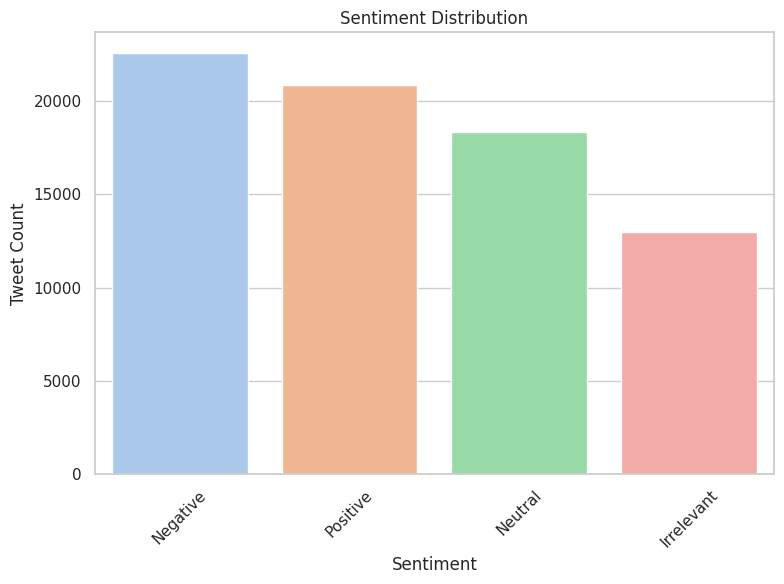

            tweet_count  avg_length  max_length  min_length
Sentiment                                                  
Irrelevant        12990  109.973980         692           1
Negative          22542  110.401828         727           1
Neutral           18318  117.506660         957           1
Positive          20832   95.136617         692           1


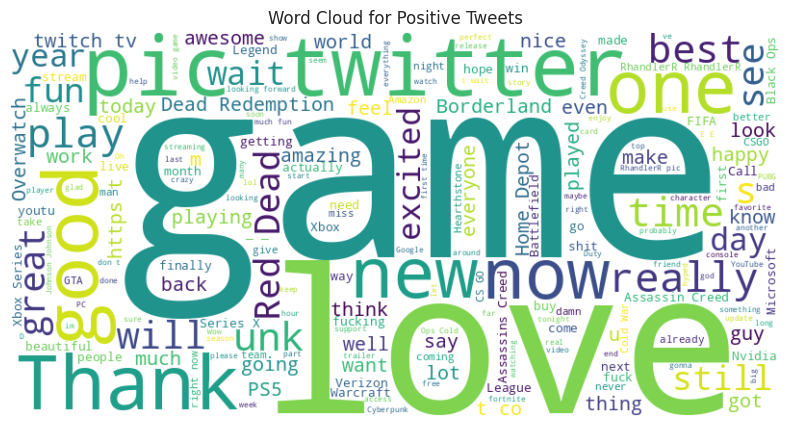

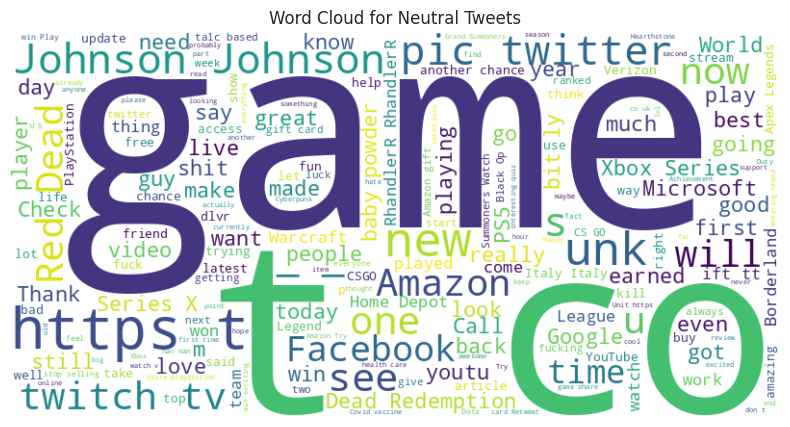

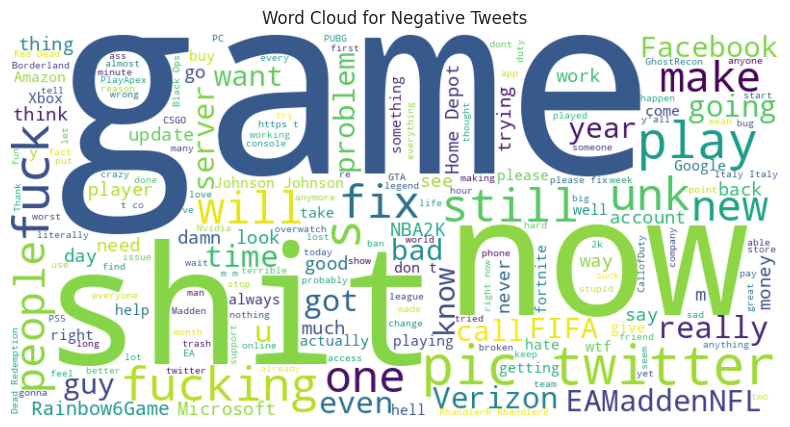

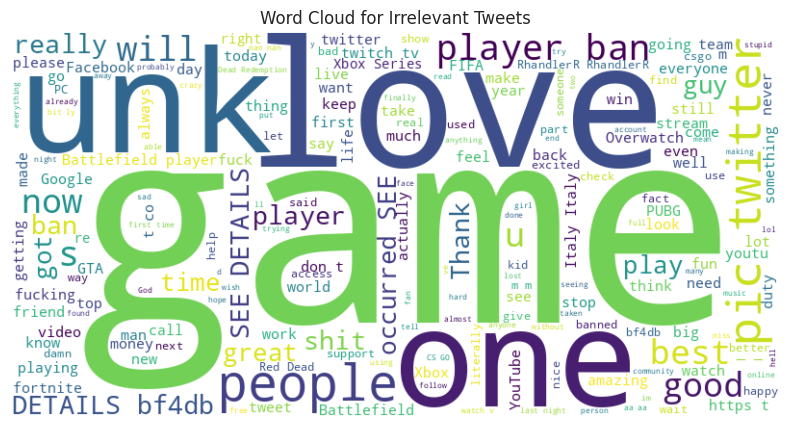

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os



df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Topic', 'Sentiment', 'Tweet']


df['Tweet'] = df['Tweet'].astype(str)

#  Sentiment Distribution Plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Sentiment', palette='pastel', order=df['Sentiment'].value_counts().index)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sentiment Stats
stats = df.groupby('Sentiment').Tweet.agg([
    ('tweet_count', 'count'),
    ('avg_length', lambda x: x.str.len().mean()),
    ('max_length', lambda x: x.str.len().max()),
    ('min_length', lambda x: x.str.len().min())
])
print(stats)

#Word Clouds for Each Sentiment
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['Tweet'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

for sentiment in df['Sentiment'].unique():
    generate_wordcloud(sentiment)